# Práctica 3. Detección de formas

Práctica realizada por: Alejandro Rodríguez Moreno y Nauzet Déniz Perdomo

In [2]:
import cv2  
import math
import numpy as np
import matplotlib.pyplot as plt

TAREA: Captura una o varias imágenes con monedas no solapadas y algún objeto que no lo sea. Filtra los contornos que no se correpondan con monedas, y muestra el número total de monedas presentes en la imagen.

Una alternativa consiste en contar círculos utilizando la Transformada de Hough. La selección de parámetros puede ser "divertida", más [información](https://docs.opencv.org/4.x/da/d53/tutorial_py_houghcircles.html)

In [118]:
#Carga imagen ejemplo con monedas
img = cv2.imread('Monedas 1.jpeg') 
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


img2 = cv2.imread('Monedas 3.jpeg') 
img_rgb2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


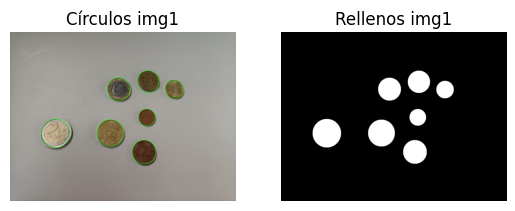

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


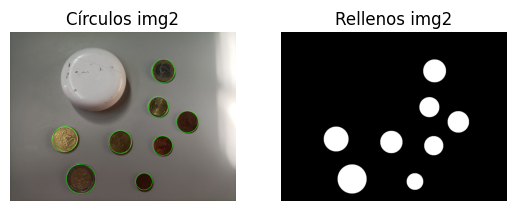

Hay 7 monedas en la primera imagen, y 8 en la segunda.


In [119]:
#Conversión a gris
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gris2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#Suaviza altas frecuencias
pimg = cv2.medianBlur(gris, 7)
pimg2 = cv2.medianBlur(gris2, 7)

#Localiza Círculos
circ = cv2.HoughCircles(
        pimg,  # imagen 
        cv2.HOUGH_GRADIENT,  # tipo de detección
        1,
        100,  # distancia mínima entre círculos
        param1=70, # Valor del gradiente
        param2=50, #Umbral acumulador
        minRadius=50,  # radio mínimo
        maxRadius=150,  # radio máximo
    )

#Localiza Círculos
circ2 = cv2.HoughCircles(
        pimg2,  # imagen 
        cv2.HOUGH_GRADIENT,  # tipo de detección
        1,
        100,  # distancia mínima entre círculos
        param1=70, # Valor del gradiente
        param2=50, #Umbral acumulador
        minRadius=40,  # radio mínimo
        maxRadius=150,  # radio máximo
    )

#Dibuja sobre entrada  e imagen vacía
img_cont = np.zeros(img_rgb.shape)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
numMonedas1 = 0
for det in circ[0]:
    numMonedas1+=1
    x_coor, y_coor, det_radio = det
    cv2.circle(img_rgb,(int(x_coor), int(y_coor)),
        int(det_radio),(0, 255, 0), 2)
    cv2.circle(img_cont,(int(x_coor), int(y_coor)),
        int(det_radio),(255, 255, 255), -1)
        
#Dibuja sobre entrada  e imagen vacía
img_cont2 = np.zeros(img_rgb2.shape)
img_rgb2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
numMonedas2 = 0
for det2 in circ2[0]:
    numMonedas2+=1
    x_coor2, y_coor2, det_radio2 = det2
    cv2.circle(img_rgb2,(int(x_coor2), int(y_coor2)),
        int(det_radio2),(0, 255, 0), 2)
    cv2.circle(img_cont2,(int(x_coor2), int(y_coor2)),
        int(det_radio2),(255, 255, 255), -1)

#Muestra resultado
plt.subplot(121)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Círculos img1')

plt.subplot(122)
plt.axis("off")
plt.imshow(img_cont) 
plt.title('Rellenos img1')

plt.show()

#Muestra resultado
plt.subplot(121)
plt.axis("off")
plt.imshow(img_rgb2) 
plt.title('Círculos img2')

plt.subplot(122)
plt.axis("off")
plt.imshow(img_cont2) 
plt.title('Rellenos img2')

plt.show()

print("Hay", numMonedas1, "monedas en la primera imagen, y",numMonedas2,"en la segunda.")

TAREA: Captura una o varias imágenes con monedas no solapadas, y otras con monedas solapadas. Identificada una moneda de un euro en la imagen, por ejemplo con un clic de ratón, calcular la cantidad de dinero presente en la imagen. ¿Qué problemas han observado?


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


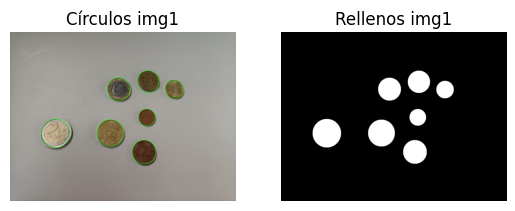

En la primera imagen en total hay 3.86 Euros


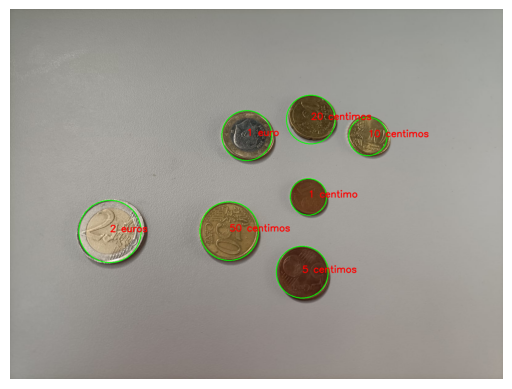

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


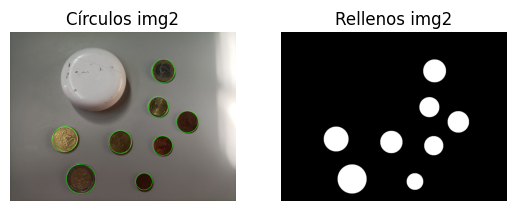

En la segunda imagen en total hay 3.88 Euros


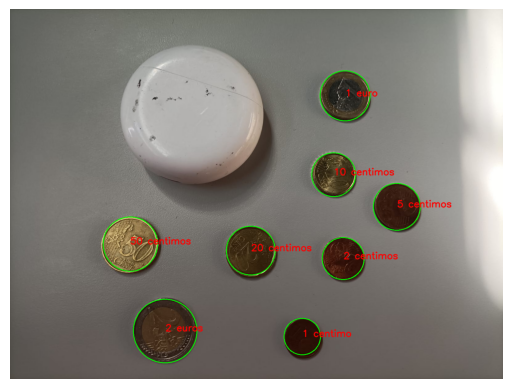

In [120]:
# font 
font = cv2.FONT_HERSHEY_SIMPLEX 

# fontScale 
fontScale = 1
   
# Blue color in BGR 
color = (255, 0, 0) 
  
# Line thickness of 2 px 
thickness = 2

xCoord = 0
yCoord = 0

def click_event(event, x, y, flags, params): 
  
    # checking for left mouse clicks 
    if event == cv2.EVENT_LBUTTONDOWN: 
        global xCoord
        global yCoord
        xCoord = x
        yCoord = y
        cv2.destroyAllWindows()
        
  
# displaying the image 
cv2.imshow('image', img_rgb) 

# setting mouse handler for the image 
# and calling the click_event() function 
cv2.setMouseCallback('image', click_event) 

# wait for a key to be pressed to exit 
cv2.waitKey(0) 

# close the window 
cv2.destroyAllWindows() 

plt.subplot(121)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Círculos img1')

plt.subplot(122)
plt.axis("off")
plt.imshow(img_cont) 
plt.title('Rellenos img1')

plt.show()

euroRadio = 0
euroCoord = (0,0)
for det in circ[0]:
    center_x, center_y, radio = det
    if(math.sqrt((xCoord - center_x) ** 2 + (yCoord - center_y) ** 2) <= radio):
        euroRadio = radio
        euroCoord = (center_x, center_y)

dinero = 0
for det in circ[0]:
    center_x, center_y, radio = det

    if((center_x, center_y) == euroCoord):
        dinero += 1
        img_rgb = cv2.putText(img_rgb, '1 euro', (round(center_x), round(center_y)), font, fontScale, color, thickness, cv2.LINE_AA) 
    elif(radio <= euroRadio*1.30 and radio >= euroRadio*1.21):
        dinero += 2
        img_rgb = cv2.putText(img_rgb, '2 euros', (round(center_x), round(center_y)), font, fontScale, color, thickness, cv2.LINE_AA) 
    elif(radio <= euroRadio*1.21 and radio >= euroRadio*1.07):
        dinero += 0.5
        img_rgb = cv2.putText(img_rgb, '50 centimos', (round(center_x), round(center_y)), font, fontScale, color, thickness, cv2.LINE_AA) 
    elif(radio <= euroRadio*1.07 and radio >= euroRadio*1.01):
        dinero += 0.05
        img_rgb = cv2.putText(img_rgb, '5 centimos', (round(center_x), round(center_y)), font, fontScale, color, thickness, cv2.LINE_AA) 
    elif(radio <= euroRadio*1.01 and radio >= euroRadio*0.93):        
        dinero += 0.2
        img_rgb = cv2.putText(img_rgb, '20 centimos', (round(center_x), round(center_y)), font, fontScale, color, thickness, cv2.LINE_AA) 
    elif(radio <= euroRadio*0.93 and radio >= euroRadio*0.76):
        dinero += 0.1
        img_rgb = cv2.putText(img_rgb, '10 centimos', (round(center_x), round(center_y)), font, fontScale, color, thickness, cv2.LINE_AA) 
    elif(radio <= euroRadio*0.76 and radio >= euroRadio*0.68):
        dinero += 0.01
        img_rgb = cv2.putText(img_rgb, '1 centimo', (round(center_x), round(center_y)), font, fontScale, color, thickness, cv2.LINE_AA) 
    else:
        img_rgb = cv2.putText(img_rgb, 'nada', (round(center_x), round(center_y)), font, fontScale, color, thickness, cv2.LINE_AA) 
    
print("En la primera imagen en total hay", dinero, "Euros")
plt.plot()
plt.axis("off")
plt.imshow(img_rgb)
plt.show()
# displaying the image 
cv2.imshow('image', img_rgb2) 

# setting mouse handler for the image 
# and calling the click_event() function 
cv2.setMouseCallback('image', click_event) 

# wait for a key to be pressed to exit 
cv2.waitKey(0) 

# close the window 
cv2.destroyAllWindows() 

plt.subplot(121)
plt.axis("off")
plt.imshow(img_rgb2) 
plt.title('Círculos img2')

plt.subplot(122)
plt.axis("off")
plt.imshow(img_cont2) 
plt.title('Rellenos img2')

plt.show()

euroRadio = 0
euroCoord = (0,0)
for det2 in circ2[0]:
    center_x, center_y, radio = det2
    if(math.sqrt((xCoord - center_x) ** 2 + (yCoord - center_y) ** 2) <= radio):
        euroRadio = radio
        euroCoord = (center_x, center_y)

dinero = 0
image = img_rgb2

for det2 in circ2[0]:
    center_x, center_y, radio = det2
    if((center_x, center_y) == euroCoord):
        dinero += 1
        img_rgb2 = cv2.putText(img_rgb2, '1 euro', (round(center_x), round(center_y)), font, fontScale, color, thickness, cv2.LINE_AA) 
    elif(radio <= euroRadio*1.30 and radio >= euroRadio*1.21):
        dinero += 2
        img_rgb2 = cv2.putText(img_rgb2, '2 euros', (round(center_x), round(center_y)), font, fontScale, color, thickness, cv2.LINE_AA) 
    elif(radio <= euroRadio*1.21 and radio >= euroRadio*1.07):
        dinero += 0.5
        img_rgb2 = cv2.putText(img_rgb2, '50 centimos', (round(center_x), round(center_y)), font, fontScale, color, thickness, cv2.LINE_AA) 
    elif(radio <= euroRadio*1.07 and radio >= euroRadio*0.97):
        dinero += 0.2
        img_rgb2 = cv2.putText(img_rgb2, '20 centimos', (round(center_x), round(center_y)), font, fontScale, color, thickness, cv2.LINE_AA) 
    elif(radio <= euroRadio*0.97 and radio >= euroRadio*0.93):
        dinero += 0.05
        img_rgb2 = cv2.putText(img_rgb2, '5 centimos', (round(center_x), round(center_y)), font, fontScale, color, thickness, cv2.LINE_AA) 
    elif(radio <= euroRadio*0.93 and radio >= euroRadio*0.85):
        dinero += 0.1
        img_rgb2 = cv2.putText(img_rgb2, '10 centimos', (round(center_x), round(center_y)), font, fontScale, color, thickness, cv2.LINE_AA) 
    elif(radio <= euroRadio*0.85 and radio >= euroRadio*0.76):
        dinero += 0.02
        img_rgb2 = cv2.putText(img_rgb2, '2 centimos', (round(center_x), round(center_y)), font, fontScale, color, thickness, cv2.LINE_AA) 
    elif(radio <= euroRadio*0.76 and radio >= euroRadio*0.68):
        dinero += 0.01
        img_rgb2 = cv2.putText(img_rgb2, '1 centimo', (round(center_x), round(center_y)), font, fontScale, color, thickness, cv2.LINE_AA) 
    else:
        img_rgb2 = cv2.putText(img_rgb2, 'nada', (round(center_x), round(center_y)), font, fontScale, color, thickness, cv2.LINE_AA) 

print("En la segunda imagen en total hay", dinero, "Euros")

plt.plot()
plt.axis("off")
plt.imshow(img_rgb2)
plt.show()

TAREA: Estas tres imágenes han sido extraidas de las imágenes de mayor tamaño contenidas en la carpeta. Determina patrones geométricos para cada una de las tres clases y evalúa los aciertos y fallos con las imágenes completas la matriz de confusión. Para cada clase, determina el número de muestras que se clasifican correctamente de dicha clase, y el número de muestras que se clasifica incorrectamente por cada una de las otras dos clases.

El el trabajo [SMACC: A System for Microplastics Automatic Counting and Classification](https://doi.org/10.1109/ACCESS.2020.2970498), las características geométricas utilizadas en dicho trabajo fueron:

- Área en píxeles
- Perímetro en píxeles
- Compacidad (relación del cuadrado del perímetro con el área)
- Relación del área con la del contenedor
- Relación del ancho y el alto del contenedor
- Relación entre los ejes de la elipse ajustada
- Definido el centroide, relación entre las distancias menor y mayor al contorno

Si no se quedan satisfechos con la segmentación obtenida, es el mundo real, también en el README comento técnicas recientes de segmentación, que podrían despertar su curiosidad.

Las métricas se utilizan para mostrar la bondad de un clasificador, la siguiente celda obtiene varias para un conjunto de datos imaginario (y con etiquetas aleatorias). Si bien las trataremos con más detalle en teoría, muestro un repertorio de ellas, dando más peso a la matriz de confusión.

¿Qué es una matriz de confusión?
Se utiliza para mostrar el comportamiento de un clasificador par alas distintas clases consideradas, se relacionan las etiquetas de las muestras anotadas frente a las predichas por el clasificador. Se busca una matriz diagonal, pero la perfección es infrecuente

(942, 1170, 3)


Text(0.5, 1.0, 'OTSU invertida')

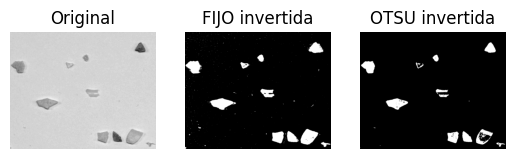

In [73]:
#Carga imagen ejemplo con monedas
img = cv2.imread('FRA.png') 
print(img.shape)
#Convierte la imagen a todos de gris, mostrando el resultado
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#Dos umbralizados. Te invito a probar con parámetros, aplicar filtro previo, etc.
umbral = 130
# Umbralizado binaria invertido, dado que por defecto se asume objetos en blanco
res,img_th1 = cv2.threshold(img_gris,umbral,255,cv2.THRESH_BINARY_INV)
# Umbralizado con método de Otsu
ret2,img_th2 = cv2.threshold(img_gris,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.subplot(1, 3, 1)
plt.axis("off")
plt.imshow(img_gris,cmap='gray') 
plt.title('Original')

plt.subplot(1, 3, 2)
plt.axis("off")
plt.imshow(img_th1,cmap='gray') 
plt.title('FIJO invertida')

plt.subplot(1, 3, 3)
plt.axis("off")
plt.imshow(img_th2,cmap='gray') 
plt.title('OTSU invertida')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1222.5 226.06601560115814 ((1124.386474609375, 907.6084594726562), (76.37956237792969, 36.82281494140625), 16.886791229248047) 1127.0 899.0 39.11531448364258 ((1122.8675537109375, 903.99755859375), (34.59870147705078, 71.48439025878906), 94.1339340209961)
6743.5 361.8061298131943 ((743.4422607421875, 847.5888671875), (93.19295501708984, 95.6277084350586), 2.0825653076171875) 744.7515869140625 845.3235473632812 55.724693298339844 ((744.5761108398438, 845.3931884765625), (96.35242462158203, 98.26265716552734), 79.66365051269531)
5055.5 407.06096267700195 ((851.5941772460938, 853.2765502929688), (113.56309509277344, 70.177001953125), 49.398704528808594) 867.0 840.0 57.489227294921875 ((856.0053100585938, 851.8864135742188), (64.75727081298828, 112.23670959472656), 132.06507873535156)
11360.0 484.75944697856903 ((993.2926635742188, 851.0361938476562), (118.19627380371094, 124.23149108886719), 19.855215072631836) 998.5 853.5 79.45133972167969 ((990.6983642578125, 844.8027954101562), (103.50

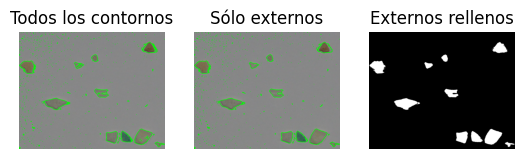

In [74]:
#Localiza contornos en imagen obtenida con umbral fijo
#findContours está diseñada para imágenes con la figura en blanco y el fondo negro
#La imagen de entrada debe ser de un canal y 8 bits excepto en los modos RETR_CCOMP o RETR_FLOODFILL
#hierarchy contiene información sobre el nivel del contorno, relaciones paterno-filiales

#Obtiene todos los contornos, externos e internos
contornos, hierarchy = cv2.findContours(
    img_th1, #imagen
    cv2.RETR_TREE, #Modo de recuperación (lista, árbol, nivel superior)
    cv2.CHAIN_APPROX_SIMPLE #Método de aproximación del contorno
    )
#Obtiene únicamente los contornos externos
contornos2, hierarchy2 = cv2.findContours(img_th1, 
    cv2.RETR_EXTERNAL , 
    cv2.CHAIN_APPROX_SIMPLE)

# Dibuja sobre la imagen de entrada todos los contornos en verde
#Cada vez que quiere pintar convierte img para no tener restos
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornos, -1, (0,255,0), 3)

plt.subplot(131)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Todos los contornos')

# Dibuja sobre la imagen de entrada sólo contornos externos
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornos2, -1, (0,255,0), 3)

plt.subplot(132)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Sólo externos')

#Dibuja contornos externos rellenos en imagen vacía
#crea imagen vacíanegra
img_cont = np.zeros(img_rgb.shape)
for c in contornos2:
    #Área delcontorno
    area = cv2.contourArea(c)

    #Dimensión mínima (útil en ocasiones)
    if area > 150:
        #Perímetro delcontorno
        perimetro = cv2.arcLength(c,True)
        #Contenedor alineado con ejes de la imagen
        x,y,w,h = cv2.boundingRect(c)
        #Mínimo contenedor ajustado para el contorno
        rect = cv2.minAreaRect(c)
        #Mínimo círculo que lo contiene
        (cx,cy),radio = cv2.minEnclosingCircle(c)
        #Elipse ajustada al contorno
        if c.shape[0] > 5:
            elipse = cv2.fitEllipse(c)
            #Para determinadas tareas nos interesará mostrar estos valores
            print(area, perimetro, rect, cx,cy,radio, elipse)

        #Dibuja los contornos
        cv2.drawContours(img_cont, [c], -1, (255,255,255), -1)

plt.subplot(133)
plt.axis("off")
plt.imshow(img_cont) 
plt.title('Externos rellenos')
plt.show()


(942, 1170, 3)


Text(0.5, 1.0, 'OTSU invertida')

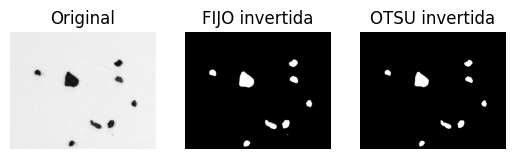

In [75]:
#Carga imagen ejemplo con monedas
img = cv2.imread('TAR.png') 
print(img.shape)
#Convierte la imagen a todos de gris, mostrando el resultado
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#Dos umbralizados. Te invito a probar con parámetros, aplicar filtro previo, etc.
umbral = 100
# Umbralizado binaria invertido, dado que por defecto se asume objetos en blanco
res,img_th1 = cv2.threshold(img_gris,umbral,255,cv2.THRESH_BINARY_INV)
# Umbralizado con método de Otsu
ret2,img_th2 = cv2.threshold(img_gris,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.subplot(1, 3, 1)
plt.axis("off")
plt.imshow(img_gris,cmap='gray') 
plt.title('Original')

plt.subplot(1, 3, 2)
plt.axis("off")
plt.imshow(img_th1,cmap='gray') 
plt.title('FIJO invertida')

plt.subplot(1, 3, 3)
plt.axis("off")
plt.imshow(img_th2,cmap='gray') 
plt.title('OTSU invertida')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1914.0 181.33809328079224 ((492.8460693359375, 899.7306518554688), (44.93071746826172, 55.747371673583984), 33.690067291259766) 496.0 902.0 29.410982131958008 ((493.9261169433594, 897.8720703125), (43.49677276611328, 57.3085823059082), 49.67400360107422)
2974.0 222.99494743347168 ((809.48583984375, 741.7724609375), (62.885711669921875, 62.36104202270508), 77.00537872314453) 811.275390625 744.8369750976562 38.30580520629883 ((808.8955078125, 742.4694213867188), (53.083736419677734, 73.35713195800781), 29.89023208618164)
3542.5 286.49242079257965 ((684.97705078125, 749.6328125), (105.92936706542969, 42.955848693847656), 26.175289154052734) 689.0 742.0 53.254207611083984 ((687.7888793945312, 749.3770141601562), (42.97138214111328, 115.20230102539062), 119.88037872314453)
1902.0 175.33809304237366 ((996.800048828125, 579.1000366210938), (49.0, 52.000003814697266), 36.869895935058594) 997.702880859375 579.517578125 28.707645416259766 ((994.7720947265625, 579.27294921875), (45.86943435668945

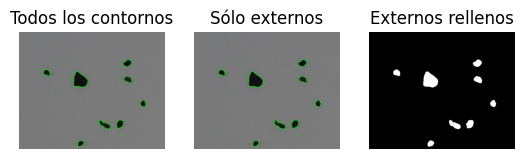

In [76]:
#Localiza contornos en imagen obtenida con umbral fijo
#findContours está diseñada para imágenes con la figura en blanco y el fondo negro
#La imagen de entrada debe ser de un canal y 8 bits excepto en los modos RETR_CCOMP o RETR_FLOODFILL
#hierarchy contiene información sobre el nivel del contorno, relaciones paterno-filiales

#Obtiene todos los contornos, externos e internos
contornos, hierarchy = cv2.findContours(
    img_th1, #imagen
    cv2.RETR_TREE, #Modo de recuperación (lista, árbol, nivel superior)
    cv2.CHAIN_APPROX_SIMPLE #Método de aproximación del contorno
    )
#Obtiene únicamente los contornos externos
contornos2, hierarchy2 = cv2.findContours(img_th1, 
    cv2.RETR_EXTERNAL , 
    cv2.CHAIN_APPROX_SIMPLE)

# Dibuja sobre la imagen de entrada todos los contornos en verde
#Cada vez que quiere pintar convierte img para no tener restos
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornos, -1, (0,255,0), 3)

plt.subplot(131)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Todos los contornos')

# Dibuja sobre la imagen de entrada sólo contornos externos
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornos2, -1, (0,255,0), 3)

plt.subplot(132)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Sólo externos')

#Dibuja contornos externos rellenos en imagen vacía
#crea imagen vacíanegra
img_cont = np.zeros(img_rgb.shape)
for c in contornos2:
    #Área delcontorno
    area = cv2.contourArea(c)

    #Dimensión mínima (útil en ocasiones)
    if area > 50:
        #Perímetro delcontorno
        perimetro = cv2.arcLength(c,True)
        #Contenedor alineado con ejes de la imagen
        x,y,w,h = cv2.boundingRect(c)
        #Mínimo contenedor ajustado para el contorno
        rect = cv2.minAreaRect(c)
        #Mínimo círculo que lo contiene
        (cx,cy),radio = cv2.minEnclosingCircle(c)
        #Elipse ajustada al contorno
        if c.shape[0] > 5:
            elipse = cv2.fitEllipse(c)
            #Para determinadas tareas nos interesará mostrar estos valores
            print(area, perimetro, rect, cx,cy,radio, elipse)

        #Dibuja los contornos
        cv2.drawContours(img_cont, [c], -1, (255,255,255), -1)

plt.subplot(133)
plt.axis("off")
plt.imshow(img_cont) 
plt.title('Externos rellenos')
plt.show()

(942, 1170, 3)


Text(0.5, 1.0, 'OTSU invertida')

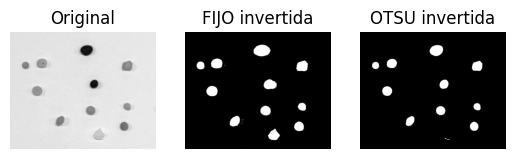

In [77]:
#Carga imagen ejemplo con monedas
img = cv2.imread('PEL.png') 
print(img.shape)
#Convierte la imagen a todos de gris, mostrando el resultado
img_gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#Dos umbralizados. Te invito a probar con parámetros, aplicar filtro previo, etc.
umbral = 111
# Umbralizado binaria invertido, dado que por defecto se asume objetos en blanco
res,img_th1 = cv2.threshold(img_gris,umbral,255,cv2.THRESH_BINARY_INV)
# Umbralizado con método de Otsu
ret2,img_th2 = cv2.threshold(img_gris,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

plt.subplot(1, 3, 1)
plt.axis("off")
plt.imshow(img_gris,cmap='gray') 
plt.title('Original')

plt.subplot(1, 3, 2)
plt.axis("off")
plt.imshow(img_th1,cmap='gray') 
plt.title('FIJO invertida')

plt.subplot(1, 3, 3)
plt.axis("off")
plt.imshow(img_th2,cmap='gray') 
plt.title('OTSU invertida')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


5456.0 351.8477592468262 ((710.6024169921875, 834.3680419921875), (82.64566802978516, 86.04129028320312), 54.21102523803711) 711.7088012695312 826.0046997070312 49.31482696533203 ((712.2091064453125, 830.8036499023438), (83.41442108154297, 90.1382827758789), 37.532135009765625)
4565.0 288.7350616455078 ((913.0, 760.0), (78.0, 76.0), 0.0) 914.2298583984375 763.0086669921875 41.016029357910156 ((913.9798583984375, 762.0587158203125), (75.42814636230469, 78.02631378173828), 113.65918731689453)
5003.5 342.4335459470749 ((399.1384582519531, 718.892333984375), (78.14188385009766, 89.05693054199219), 7.125016689300537) 395.41900634765625 717.8463745117188 48.65752410888672 ((400.01995849609375, 721.4661254882812), (69.28292846679688, 94.63023376464844), 40.41348648071289)
4878.5 313.32084810733795 ((645.0, 635.0), (76.0, 84.0), 90.0) 645.5 638.5 43.341766357421875 ((645.9591674804688, 635.9241943359375), (75.46916961669922, 83.21089935302734), 103.87335968017578)
3146.5 227.58073389530182 ((9

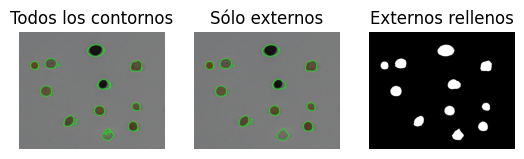

In [78]:
#Localiza contornos en imagen obtenida con umbral fijo
#findContours está diseñada para imágenes con la figura en blanco y el fondo negro
#La imagen de entrada debe ser de un canal y 8 bits excepto en los modos RETR_CCOMP o RETR_FLOODFILL
#hierarchy contiene información sobre el nivel del contorno, relaciones paterno-filiales

#Obtiene todos los contornos, externos e internos
contornos, hierarchy = cv2.findContours(
    img_th1, #imagen
    cv2.RETR_TREE, #Modo de recuperación (lista, árbol, nivel superior)
    cv2.CHAIN_APPROX_SIMPLE #Método de aproximación del contorno
    )
#Obtiene únicamente los contornos externos
contornos2, hierarchy2 = cv2.findContours(img_th1, 
    cv2.RETR_EXTERNAL , 
    cv2.CHAIN_APPROX_SIMPLE)

# Dibuja sobre la imagen de entrada todos los contornos en verde
#Cada vez que quiere pintar convierte img para no tener restos
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornos, -1, (0,255,0), 3)

plt.subplot(131)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Todos los contornos')

# Dibuja sobre la imagen de entrada sólo contornos externos
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2.drawContours(img_rgb, contornos2, -1, (0,255,0), 3)

plt.subplot(132)
plt.axis("off")
plt.imshow(img_rgb) 
plt.title('Sólo externos')

#Dibuja contornos externos rellenos en imagen vacía
#crea imagen vacíanegra
img_cont = np.zeros(img_rgb.shape)
for c in contornos2:
    #Área delcontorno
    area = cv2.contourArea(c)

    #Dimensión mínima (útil en ocasiones)
    if area > 50:
        #Perímetro delcontorno
        perimetro = cv2.arcLength(c,True)
        #Contenedor alineado con ejes de la imagen
        x,y,w,h = cv2.boundingRect(c)
        #Mínimo contenedor ajustado para el contorno
        rect = cv2.minAreaRect(c)
        #Mínimo círculo que lo contiene
        (cx,cy),radio = cv2.minEnclosingCircle(c)
        #Elipse ajustada al contorno
        if c.shape[0] > 5:
            elipse = cv2.fitEllipse(c)
            #Para determinadas tareas nos interesará mostrar estos valores
            print(area, perimetro, rect, cx,cy,radio, elipse)

        #Dibuja los contornos
        cv2.drawContours(img_cont, [c], -1, (255,255,255), -1)

plt.subplot(133)
plt.axis("off")
plt.imshow(img_cont) 
plt.title('Externos rellenos')
plt.show()